In [11]:
import pandas as pd
import numpy as np
import os
import sys
data_dir = os.getcwd()+"/log_data/"
sys.argv = ["file","train.csv", "test.csv", "param_a.txt" ,"outputfile.csv", "weightfile.csv"]

In [12]:
def hotencode_train(data):
    train = pd.DataFrame()
    parents = pd.get_dummies(data[0], prefix="parents")
    has_nurs = pd.get_dummies(data[1], prefix="has_nurs")
    form = pd.get_dummies(data[2], prefix="form")
    children = pd.get_dummies(data[3], prefix="children")
    housing = pd.get_dummies(data[4], prefix="housing")
    finance = pd.get_dummies(data[5], prefix="finance")
    social = pd.get_dummies(data[6], prefix="social")
    health = pd.get_dummies(data[7], prefix="health")
    classDistribution = pd.get_dummies(data[8], prefix="class")
    train = pd.concat([parents, has_nurs, form, children, housing,
                    finance, social, health, classDistribution], axis=1)
    cols = ['parents_usual', 'parents_pretentious', 'parents_great_pret', 'has_nurs_proper', 'has_nurs_less_proper', 'has_nurs_improper',
            'has_nurs_critical', 'has_nurs_very_crit',
            'form_complete', 'form_completed', 'form_incomplete', 'form_foster',
            'children_1', 'children_2', 'children_3', 'children_more',
            'housing_convenient', 'housing_less_conv', 'housing_critical',
            'finance_convenient', 'finance_inconv',
            'social_nonprob', 'social_slightly_prob', 'social_problematic',
            'health_recommended', 'health_priority', 'health_not_recom',
            'class_not_recom', 'class_recommend', 'class_very_recom', 'class_priority', 'class_spec_prior']

    return train[pd.Index(cols)]

In [13]:
def hotencode_test(data):
    train = pd.DataFrame()
    parents = pd.get_dummies(data[0], prefix="parents")
    has_nurs = pd.get_dummies(data[1], prefix="has_nurs")
    form = pd.get_dummies(data[2], prefix="form")
    children = pd.get_dummies(data[3], prefix="children")
    housing = pd.get_dummies(data[4], prefix="housing")
    finance = pd.get_dummies(data[5], prefix="finance")
    social = pd.get_dummies(data[6], prefix="social")
    health = pd.get_dummies(data[7], prefix="health")
    train = pd.concat([parents, has_nurs, form, children, housing,
                    finance, social, health], axis=1)
    cols = ['parents_usual', 'parents_pretentious', 'parents_great_pret', 'has_nurs_proper', 'has_nurs_less_proper', 'has_nurs_improper',
            'has_nurs_critical', 'has_nurs_very_crit',
            'form_complete', 'form_completed', 'form_incomplete', 'form_foster',
            'children_1', 'children_2', 'children_3', 'children_more',
            'housing_convenient', 'housing_less_conv', 'housing_critical',
            'finance_convenient', 'finance_inconv',
            'social_nonprob', 'social_slightly_prob', 'social_problematic',
            'health_recommended', 'health_priority', 'health_not_recom']
    return train[pd.Index(cols)]

In [27]:
train_data = pd.read_csv(data_dir+sys.argv[1], header=None)
test_data = pd.read_csv(data_dir+sys.argv[2], header=None)
with open(data_dir+sys.argv[3],"r") as f:
    params = np.array(f.read().replace(",","\n")[:-1].split("\n")).astype(np.float)   
    print(params)
train_data = hotencode_train(train_data)
test_data = hotencode_test(test_data)
classes = train_data.iloc[:,-5:].values
features = train_data.iloc[:,:-5].values
features = np.c_[np.ones(len(train_data)),features]
X_train = features[:,:]
Y_train = classes[:,:]
# testFeatures = test_data.iloc[:,:].values
# testFeatures = np.c_[np.ones(len(test_data)),testFeatures]
# X_test = features[:,:]
# Y_test = classes[:,:]


[3.e+00 1.e-03 5.e-02 1.e-02 1.e+04]


In [8]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

NameError: name 'X_test' is not defined

In [9]:
def gradient(X,Y,W):
    XW = np.exp(np.matmul(X, W))
    denom = np.sum(XW, axis=1)
    Y_predict = np.divide(XW, denom.reshape(X.shape[0], 1))
    return np.matmul(X.transpose(), Y - Y_predict)/X.shape[0]

In [10]:
def cost(W,X,Y):
    XW = np.exp(np.matmul(X,W))
    denom = np.sum(XW, axis=1)
    Y_predict = np.divide(XW, denom.reshape(X.shape[0], 1))
    ee = -np.trace(np.matmul(Y.T,np.log(Y_predict)))/X.shape[0]
#     logTerm = np.log(np.sum(XW,axis=1))
#     weightedTerm = np.sum(np.multiply(np.matmul(Y,W.T),X),axis=1)
#     error = np.sum(logTerm-weightedTerm)/X.shape[0]
#     print(error,ee)
    return ee

In [29]:
np.dot(grad.reshape(140,1).T,grad.reshape(140,1))

0.5579236488340189

In [33]:
params

array([3.e+00, 1.e-03, 5.e-01, 1.e+03])

In [129]:
# backtracking part
if(params[0] == 3):
    w_initial = np.zeros(28*5).reshape(28, 5)
    costAr = []
    costAr.append(0)
    alpha = params[2]
    beta = params[3]
    n =params[1]
    # print(params[3])
    for j in range(1, int(params[4])):
        grad = gradient(X_train,Y_train,w_initial)
        while(cost(w_initial-n*grad,X_train,Y_train) > cost(w_initial,X_train,Y_train)-alpha*n*np.dot(grad.reshape(140,1).T,grad.reshape(140,1))[0][0]):
            n*=beta
        w_initial = w_initial+n*grad
        c = cost(w_initial,X_train,Y_train)
        print((j,c,n), end="\r", flush=True)
        costAr.append(c)
        if(abs(costAr[j-1]-costAr[j])<.000001 and j>1):
            break
    print(j)

In [159]:
np.inf

inf

In [1]:
# part b
# if(params[0] == 1):
#     w_initial = np.ones(28*5).reshape(28, 5)
#     costAr = []
#     costAr.append(0)
#     k = int(params[3])
#     l = X_train.shape[0]
#     index=0
#     for i in range(0,int(l/k)-1):
#         for j in range(1, int(params[2])):
#             index+=1
#             grad  = gradient(X_train[int((l/k)*i):int((l/k)*(i+1)),:] , Y_train[int((l/k)*i):int((l/k)*(i+1)),:], w_initial)
#             w_initial = w_initial+params[1]*grad 
#             c = cost(w_initial,X_train,Y_train)
#             costAr.append(c)
#             print((j,i,c), end="\r", flush=True)
#             if(costAr[index-1]-costAr[index]<0 and j>1):
#                 break
if(params[0] == 1):
    w_initial = np.ones(28*5).reshape(28, 5)
    costAr = []
    costAr.append(0)
    k = int(params[3])
    l = X_train.shape[0]
    index=0
    print(l/k)
    for i in range(0,int(l/k)):    
        startIndex = int(k*i)
        endIndex = int(k*(i+1))
        for j in range(1, int(params[2])):    
            index+=1
            grad  = gradient(X_train[startIndex:endIndex,:] , Y_train[startIndex:endIndex,:], w_initial)
            w_temp = w_initial+params[1]*grad 
            c = cost(w_initial,X_train[startIndex:endIndex,:],Y_train[startIndex:endIndex,:])
            if(c!=c):
                break
            costAr.append(c)
            print((startIndex,endIndex,j,i,c), end="\r", flush=True)
#             print(j,i,c)
            if(abs(costAr[index-1]-costAr[index])<0.00001):
                break
            w_initial = w_temp             
                

NameError: name 'params' is not defined

In [104]:
print(j)
# w_initial = (w_initial.T - w_initial.T[0]).T
WmulX = np.exp(np.matmul(X_test, w_initial))
denom = np.sum(WmulX, axis=1)
Y_predict = np.divide(WmulX, denom.reshape(len(X_test), 1))
b = np.zeros_like(Y_predict)
b[np.arange(len(Y_predict)), Y_predict.argmax(1)] = 1
Y_predict = b
accuracy = np.trace(np.matmul(Y_predict, Y_test.T))/len(X_test)
print(accuracy)

2
0.9041666666666667


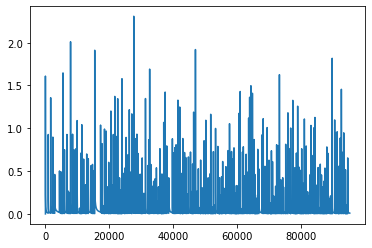

In [156]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(costAr)),costAr)
plt.show()

In [ ]:
# print(X_train.shape,Y_train.shape,X_test.shape)
w_initial = np.ones(28*5).reshape(28, 5)
cost(w_initial,X_train,Y_train)

In [ ]:
w_initial = np.ones(28*5).reshape(28, 5)
k =1
l = X_train.shape[0]
costAr = []
for j in range(1, 40000):
    grad = gradient(X_train,Y_train,w_initial)
    w_initial = w_initial+0.1*grad  
    c = cost(w_initial,X_train,Y_train)
    print((j,c), end="\r", flush=True)
    costAr.append(c)

In [74]:
import numpy as np
alpha = 0.3
beta = 0.8

f = lambda x: (x[0]**2 + 3*x[1]*x[0] + 12)
dfx1 = lambda x: (2*x[0] + 3*x[1])
dfx2 = lambda x: (3*x[0])

t = 1
count = 1
x0 = np.array([2,3])
dx0 = np.array([.1, 0.05])


def backtrack(x0, dfx1, dfx2, t, alpha, beta, count):
    while (f(x0) - (f(x0 - t*np.array([dfx1(x0), dfx2(x0)])) + alpha * t * np.dot(np.array([dfx1(x0), dfx2(x0)]), np.array([dfx1(x0), dfx2(x0)])))) < 0:
        t *= beta
        print("""

########################
###   iteration {}   ###
########################
""".format(count))
        print("Inequality: ",  f(x0) - (f(x0 - t*np.array([dfx1(x0), dfx2(x0)])) + alpha * t * np.dot(np.array([dfx1(x0), dfx2(x0)]), np.array([dfx1(x0), dfx2(x0)]))))
        count += 1
    return t

t = backtrack(x0, dfx1, dfx2, t, alpha, beta,count)

print("\nfinal step size :",  t)



########################
###   iteration 1   ###
########################

Inequality:  -143.12


########################
###   iteration 2   ###
########################

Inequality:  -73.22880000000006


########################
###   iteration 3   ###
########################

Inequality:  -32.172032000000044


########################
###   iteration 4   ###
########################

Inequality:  -8.834580480000021


########################
###   iteration 5   ###
########################

Inequality:  3.7502844927999845

final step size : 0.32768000000000014


In [49]:
# import matplotlib.pyplot as plt
# plt.plot(range(0, len(costValues[1:5000])),costValues[1:5000])
# plt.show()
alpha = [0.000005,0.00001,0.00005,0.0001, .001, .01,0.1,1,10]
batch = [10, 20 , 30 ,40 ,50]

In [64]:
print(np.where(a==np.max(a)),"\n\n",a)

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3]), array([0, 1, 3, 4, 0, 1, 4, 0, 1, 2, 0, 1, 2, 3, 4])) 

 [[0.92333333 0.92333333 0.92166667 0.92333333 0.92333333]
 [0.92333333 0.92333333 0.92166667 0.92166667 0.92333333]
 [0.92333333 0.92333333 0.92333333 0.92166667 0.92166667]
 [0.92333333 0.92333333 0.92333333 0.92333333 0.92333333]
 [0.915      0.915      0.915      0.915      0.91666667]
 [0.91333333 0.91333333 0.91333333 0.91333333 0.915     ]
 [0.90333333 0.90333333 0.90166667 0.90166667 0.9       ]
 [0.84       0.83166667 0.80666667 0.78166667 0.75666667]
 [0.675      0.55833333 0.65666667 0.64       0.61166667]]


In [72]:
lam, batch =  np.where(a==np.max(a))[0][0], np.where(a==np.max(a))[1][0]

In [73]:
print(lam,bathc)

0 0


In [55]:
a = np.zeros((len(alpha),len(batch)))
print(a[5][4])

0.0


In [57]:
for m in range(0,len(batch)):
    for n in range(0,len(alpha)):
        w_initial = np.ones(28*5).reshape(28, 5)
        w_initial = (w_initial.T - w_initial.T[0]).T
        costAr = []
        k = batch[m]
        l = X_train.shape[0]
        costAr.append(0)
        for j in range(1, int(params[2])):
            for i in range(0,k):
                grad  = gradient(X_train[int((l/k)*i):int((l/k)*(i+1)),:] , Y_train[int((l/k)*i):int((l/k)*(i+1)),:], w_initial)
                w_initial = w_initial+params[1]*(grad-alpha[n]*w_initial)
                w_initial = (w_initial.T - w_initial.T[0]).T
            c = cost(w_initial,X_train,Y_train)
            print((j,c), end="\r", flush=True)
            costAr.append(c)
            if(costAr[j-1]-costAr[j]<.00001 and j>10):
                print(costAr[j],costAr[j-1])
                break
        print(j)
        w_initial = (w_initial.T - w_initial.T[0]).T
        WmulX = np.exp(np.matmul(X_test, w_initial))
        denom = np.sum(WmulX, axis=1)
        Y_predict = np.divide(WmulX, denom.reshape(len(X_test), 1))
        b = np.zeros_like(Y_predict)
        b[np.arange(len(Y_predict)), Y_predict.argmax(1)] = 1
        Y_predict = b
        accuracy = np.trace(np.matmul(Y_predict, Y_test.T))/len(X_test)
        print(n,m,accuracy)
        a[n][m]=accuracy        

0.1868589334800851 0.18686893284266848
1278
0 0 0.9233333333333333
0.18699018492586442 0.1870001717311152
1277
1 0 0.9233333333333333
0.18814892514147807 0.18815891971104612
1260
2 0 0.9233333333333333
0.18966449807126545 0.18967449422318358
1236
3 0 0.9233333333333333
0.2169446874945069 0.21695466395025786
843
4 0 0.915
0.34264029963364295 0.34265020957933695
251
5 0 0.9133333333333333
0.7001408270588976 0.7001499651944685
52
6 0 0.9033333333333333
1.2825377917344263 1.282538627570496
11
7 0 0.84
1.557699860735422 1.557699860735422
11
8 0 0.675
0.182891497232636 0.1829014914316851
920
0 1 0.9233333333333333
0.1830456947415194 0.1830556903583095
918
1 1 0.9233333333333333
0.18433265866876816 0.18434265508255895
900
2 1 0.9233333333333333
0.1860422523241154 0.18605223406658583
874
3 1 0.9233333333333333
0.21537876929005212 0.21538874098415206
531
4 1 0.915
0.34235336769326874 0.34236335170585164
146
5 1 0.9133333333333333
0.7001554785790057 0.7001633301427239
29
6 1 0.9033333333333333
1

In [ ]:
# part a
if(params[0] == 1):
    w_initial = np.ones(28*5).reshape(28, 5)
    w_initial = (w_initial.T - w_initial.T[0]).T
    costAr = []
    costAr.append(0)
    for j in range(1, int(params[2])):
        grad = gradient(X_train,Y_train,w_initial)
        w_initial = w_initial+params[1]*grad 
        w_initial = (w_initial.T - w_initial.T[0]).T
        c = cost(w_initial,X_train,Y_train)
        print((j,c), end="\r", flush=True)
        costAr.append(c)
        if(costAr[j-1]-costAr[j]<.00001 and j>10):
            print(costAr[j],costAr[j-1])
            break
if(params[0] == 2):
    w_initial = np.ones(28*5).reshape(28, 5)
    w_initial = (w_initial.T - w_initial.T[0]).T
    costAr = []
    costAr.append(0)
    for j in range(1, int(params[2])):
        grad = gradient(X_train,Y_train,w_initial)
        w_initial = w_initial+(params[1]/np.sqrt(j))*grad 
        w_initial = (w_initial.T - w_initial.T[0]).T
        c = cost(w_initial,X_train,Y_train)
        print((j,c), end="\r", flush=True)
        costAr.append(c)
        if(costAr[j-1]-costAr[j]<.00001 and j>20):
            print(costAr[j],costAr[j-1])
            break

In [31]:
# part a
if(params[0] == 1):
    w_initial = np.ones(28*5).reshape(28, 5)
    w_initial = (w_initial.T - w_initial.T[0]).T
    costAr = []
    costAr.append(0)
    for j in range(1, int(params[2])):
        grad = gradient(X_train,Y_train,w_initial)
        w_initial = w_initial+params[1]*grad 
        w_initial = (w_initial.T - w_initial.T[0]).T
        c = cost(w_initial,X_train,Y_train)
        print((j,c), end="\r", flush=True)
        costAr.append(c)
        if(costAr[j-1]-costAr[j]<.00001 and j>10):
            print(costAr[j],costAr[j-1])
            break
if(params[0] == 2):
    w_initial = np.ones(28*5).reshape(28, 5)
    w_initial = (w_initial.T - w_initial.T[0]).T
    costAr = []
    costAr.append(0)
    for j in range(1, int(params[2])):
        grad = gradient(X_train,Y_train,w_initial)
        w_initial = w_initial+(params[1]/np.sqrt(j))*grad 
        w_initial = (w_initial.T - w_initial.T[0]).T
        c = cost(w_initial,X_train,Y_train)
        print((j,c), end="\r", flush=True)
        costAr.append(c)
        if(costAr[j-1]-costAr[j]<.00001 and j>20):
            print(costAr[j],costAr[j-1])
            break
if(params[0] == 3):
    w_initial = np.zeros(28*5).reshape(28, 5)
    costAr = []
    costAr.append(0)
    alpha = params[2]
    beta = params[3]
    n =params[1]
    # print(params[3])
    for j in range(1, int(params[4])*2):
        grad = gradient(X_train,Y_train,w_initial)
        while(cost(w_initial+n*grad,X_train,Y_train) > cost(w_initial,X_train,Y_train)-alpha*n*np.dot(grad.reshape(140,1).T,grad.reshape(140,1))[0][0]):
            n*=beta
        w_initial = w_initial+n*grad 
        c = cost(w_initial,X_train,Y_train)
        print((j,c,n), end="\r", flush=True)
        costAr.append(c)
        if(abs(costAr[j-1]-costAr[j])<.000001 and j>1):
            break
    print(j)             

199999, 0.44979943661567906, 0.001)


# For backtracking

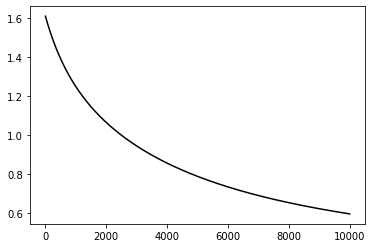

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(costAr[1:10000])),costAr[1:10000],color = "black")
plt.show()

# For Constant Learning rate

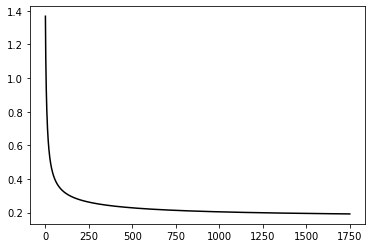

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(costAr[1:])),costAr[1:],color = "black")
plt.show()

# For adaptive learning

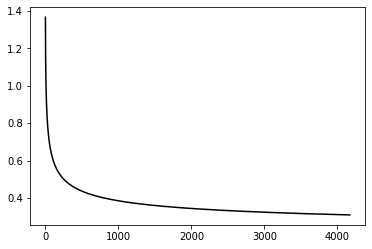

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(costAr[1:])),costAr[1:],color = "black")
plt.show()

In [ ]:
w_initial = np.random.rand(28, 5)
w_initial = (w_initial.T - w_initial.T[0]).T
# w_temp = np.zeros(28*5).reshape(28,5)
k =1
l = X_train.shape[0]
costAr = []
for j in range(1, 10000):
    for i in range(0,k):
        grad  = gradient(X_train[int((l/k)*i):int((l/k)*(i+1)),:] , Y_train[int((l/k)*i):int((l/k)*(i+1)),:], w_initial)
        grad = gradient(X_train,Y_train,w_initial)
        w_initial = w_initial+(params[1]/((l/k)))*grad  
        w_initial = (w_initial.T - w_initial.T[0]).T
    w_temp = w_initial
    l = cost(w_temp,X_train,Y_train)
    print((j,l), end="\r", flush=True)
    costAr.append(l)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(costAr[1000:2000])),costAr[1000:2000])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(costAr)),costAr)
plt.show()

In [ ]:
Y_predict[:,0] =1*Y_predict[:,0]
Y_predict[:,1] =2*Y_predict[:,1]
Y_predict[:,2] =3*Y_predict[:,2]
Y_predict[:,3] =4*Y_predict[:,3]
Y_predict[:,4] =5*Y_predict[:,4]
Y_predict = np.sum(Y_predict,axis=1).tolist()
predict = []
for i in range(0,len(Y_predict)):
    if(Y_predict[i]==1):
        predict.append("not_recom")
    elif(Y_predict[i]==2):
        predict.append("recommend")
    elif(Y_predict[i]==3):
        predict.append("very_recom")
    elif(Y_predict[i]==4):
        predict.append("priority")
    elif(Y_predict[i]==5):
        predict.append("spec_prior")

Y_predict = pd.DataFrame(predict)
Y_predict.to_csv(data_dir+sys.argv[4], header=False, index=False)

In [ ]:
w_initial = pd.DataFrame(w_initial)
w_initial.to_csv(data_dir+sys.argv[5], header=False, index=False)
# print(accuracy)

In [ ]:
Y_predict

In [ ]:
np.nonzero(w_initial)[0].shape

In [ ]:
print(features.shape,w_initial.shape)

In [ ]:
WmulX = np.exp(np.matmul(X_train,w_initial))
denom = np.sum(WmulX,axis=1)
Y_predict = np.divide(WmulX,denom.reshape(6000,1))
Y_predict[Y_predict>0.5]=1
Y_predict[Y_predict<0.5]=0
accuracy = np.trace(np.matmul(Y_predict,Y_train.T))/(6000)
print(("   accuracy="+str(accuracy*100)+"%"),end="\r",)

In [ ]:
WmulX = np.exp(np.matmul(X_test,w_initial))
denom = np.sum(WmulX,axis=1)
Y_predict = np.divide(WmulX,denom.reshape(600,1))
Y_predict[Y_predict>=0.5]=1
Y_predict[Y_predict<0.5]=0

In [ ]:
Y_predict*Y_test

In [ ]:
Y_predict.astype("int")

In [ ]:
np.trace(np.matmul(Y_predict,Y_test.T))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# print(features.shape,labels.shape)
# pyplot.bar(range(0,len(er)),[er,erMin])
df1 = pd.DataFrame({'Y_predict': (Y_predict)[:100,1], 'Y_test': Y_test[:100,1]})
df1.plot(kind='bar',figsize=(30,30))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()